# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Lambda, Permute
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
# from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical

In [ ]:
df1 = pd.read_csv('/content/SpectralFeatures.csv')
df2 = pd.read_csv('/content/CepstralFeatures.csv')
df3 = pd.read_csv('/content/GFCC_Features.csv')


# Feature Selection

## Spectral Features

In [ ]:
df1

,Unnamed: 0,zero_crossing_rate,spectral_centroids,spectral_centroids_delta,spectral_centroids_accelerate,spectral_rolloff,spectral_flux,spectral_bandwidth_2,spectral_bandwidth_3,spectral_bandwidth_4,Species,Id
0,0,0.078066,1839.156620,-10.186710,0.989145,3713.864057,1.179437,2103.391864,2649.049331,3159.755894,coromandelica,10584.wav
1,1,0.318597,3672.955429,0.110991,0.017840,5910.042828,1.183284,2333.206209,2719.142718,3053.269621,coromandelica,10847.wav
2,2,0.353334,4389.667213,0.244910,-1.551855,7886.046254,1.406055,2902.910584,3188.733310,3406.633096,coromandelica,10856.wav
3,3,0.318597,3672.955429,0.110991,0.017840,5910.042828,1.183284,2333.206209,2719.142718,3053.269621,coromandelica,10874.wav
4,4,0.154627,2432.532155,-2.462851,1.587364,4946.740024,1.354797,2558.880458,3009.252882,3433.571502,coromandelica,10896.wav
...,...,...,...,...,...,...,...,...,...,...,...,...
4652,4652,0.016727,1019.146511,-0.084270,0.038954,2178.315445,0.943160,1940.623580,2729.117225,3433.824625,torqueola,99626.wav
4653,4653,0.161747,2032.836078,-0.227467,0.123681,3218.204498,0.913411,1331.598949,1725.632123,2135.493949,torqueola,99758.wav
4654,4654,0.037748,1225.350166,-0.237904,0.018843,2585.756142,0.983082,2001.744267,2765.859002,3442.128127,torqueola,99786.wav
4655,4655,0.094836,2214.300521,-0.298142,-0.206073,4376.364803,1.129413,2300.594756,2909.764700,3458.096475,torqueola,99790.wav


In [ ]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
le1 = LabelEncoder()
df1['Species'] = le1.fit_transform(df3['Species'])

In [ ]:
corr = df1.corr()
l = corr['Species']

<ipython-input-73-9e36ca25533d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


In [ ]:
l

zero_crossing_rate              -0.247254
spectral_centroids              -0.215681
spectral_centroids_delta         0.026560
spectral_centroids_accelerate   -0.008016
spectral_rolloff                -0.127072
spectral_flux                   -0.291120
spectral_bandwidth_2             0.012853
spectral_bandwidth_3             0.036013
spectral_bandwidth_4             0.061153
Species                          1.000000
Name: Species, dtype: float64

In [ ]:
index = []
for i in range(len(l)):
  if l[i]>0.1 or l[i]<-0.1:
    index.append(i)

In [ ]:
index

[0, 1, 4, 5, 9]

In [ ]:
col = df1.columns[index]

In [ ]:
col

Index(['zero_crossing_rate', 'spectral_centroids', 'spectral_rolloff',
       'spectral_flux', 'Species'],
      dtype='object')

In [ ]:
train1 = df1[col]

## Cepstral Features

In [ ]:
df2

,Unnamed: 0,spectrogram,mel_spectrogram,harmonics,perceptual_shock_wave,chroma1,chroma2,chroma3,chroma4,chroma5,...,mfcc_delta_10,mfcc_accelerate_10,mfcc11,mfcc_delta_11,mfcc_accelerate_11,mfcc12,mfcc_delta_12,mfcc_accelerate_12,Species,Id
0,0,-42.831215,-62.777210,-4.587387e-05,1.695039e-05,0.471150,0.502096,0.530954,0.536972,0.588601,...,0.041985,-0.020159,2.888700,0.035669,-0.014533,14.327877,0.028072,-0.008288,coromandelica,10584.wav
1,1,-72.204445,-80.000000,-3.799724e-06,-8.457318e-06,0.418295,0.345086,0.405665,0.562165,0.509536,...,-0.001301,0.000550,-9.553414,0.000096,-0.000462,-5.047387,-0.001673,-0.000455,coromandelica,10847.wav
2,2,-43.799530,-68.962120,-1.026703e-05,-6.926698e-06,0.342672,0.493808,0.382322,0.302983,0.318441,...,-0.050205,-0.010581,-0.860468,-0.012053,0.001277,3.029219,0.064608,0.031602,coromandelica,10856.wav
3,3,-72.204445,-80.000000,-3.799724e-06,-8.457318e-06,0.418295,0.345086,0.405665,0.562165,0.509536,...,-0.001301,0.000550,-9.553414,0.000096,-0.000462,-5.047387,-0.001673,-0.000455,coromandelica,10874.wav
4,4,-40.172640,-67.117760,-3.682914e-05,-2.043327e-04,0.520443,0.525269,0.516246,0.518910,0.611567,...,0.067209,0.018032,-19.432072,-0.005643,-0.006593,4.173377,-0.036599,-0.012950,coromandelica,10896.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,4652,-23.123005,-23.789790,6.089698e-05,7.799226e-06,0.646036,0.807361,0.751281,0.739140,0.759720,...,-0.001307,0.000745,12.476957,-0.000993,-0.001319,9.819007,0.000623,-0.002738,torqueola,99626.wav
4653,4653,-79.954025,-80.000000,-1.947613e-08,1.054500e-07,0.513994,0.520548,0.380037,0.382176,0.410112,...,0.002809,0.003433,-7.030613,0.000806,0.003140,-0.247199,-0.006227,0.008334,torqueola,99758.wav
4654,4654,-37.841366,-40.356018,4.087361e-05,8.387263e-05,0.609282,0.556254,0.434351,0.431656,0.490398,...,-0.000534,-0.000050,5.212639,-0.000845,0.000558,4.737491,-0.000223,0.000023,torqueola,99786.wav
4655,4655,-50.213410,-55.499043,-1.805201e-06,5.885852e-07,0.469665,0.409756,0.467876,0.567217,0.649764,...,0.001150,0.003062,13.462470,-0.002456,-0.001181,4.577459,-0.001960,-0.001933,torqueola,99790.wav


In [ ]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df2

,spectrogram,mel_spectrogram,harmonics,perceptual_shock_wave,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,...,mfcc_delta_10,mfcc_accelerate_10,mfcc11,mfcc_delta_11,mfcc_accelerate_11,mfcc12,mfcc_delta_12,mfcc_accelerate_12,Species,Id
0,-42.831215,-62.777210,-4.587387e-05,1.695039e-05,0.471150,0.502096,0.530954,0.536972,0.588601,0.615048,...,0.041985,-0.020159,2.888700,0.035669,-0.014533,14.327877,0.028072,-0.008288,coromandelica,10584.wav
1,-72.204445,-80.000000,-3.799724e-06,-8.457318e-06,0.418295,0.345086,0.405665,0.562165,0.509536,0.349674,...,-0.001301,0.000550,-9.553414,0.000096,-0.000462,-5.047387,-0.001673,-0.000455,coromandelica,10847.wav
2,-43.799530,-68.962120,-1.026703e-05,-6.926698e-06,0.342672,0.493808,0.382322,0.302983,0.318441,0.508339,...,-0.050205,-0.010581,-0.860468,-0.012053,0.001277,3.029219,0.064608,0.031602,coromandelica,10856.wav
3,-72.204445,-80.000000,-3.799724e-06,-8.457318e-06,0.418295,0.345086,0.405665,0.562165,0.509536,0.349674,...,-0.001301,0.000550,-9.553414,0.000096,-0.000462,-5.047387,-0.001673,-0.000455,coromandelica,10874.wav
4,-40.172640,-67.117760,-3.682914e-05,-2.043327e-04,0.520443,0.525269,0.516246,0.518910,0.611567,0.700089,...,0.067209,0.018032,-19.432072,-0.005643,-0.006593,4.173377,-0.036599,-0.012950,coromandelica,10896.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,-23.123005,-23.789790,6.089698e-05,7.799226e-06,0.646036,0.807361,0.751281,0.739140,0.759720,0.744716,...,-0.001307,0.000745,12.476957,-0.000993,-0.001319,9.819007,0.000623,-0.002738,torqueola,99626.wav
4653,-79.954025,-80.000000,-1.947613e-08,1.054500e-07,0.513994,0.520548,0.380037,0.382176,0.410112,0.365738,...,0.002809,0.003433,-7.030613,0.000806,0.003140,-0.247199,-0.006227,0.008334,torqueola,99758.wav
4654,-37.841366,-40.356018,4.087361e-05,8.387263e-05,0.609282,0.556254,0.434351,0.431656,0.490398,0.509364,...,-0.000534,-0.000050,5.212639,-0.000845,0.000558,4.737491,-0.000223,0.000023,torqueola,99786.wav
4655,-50.213410,-55.499043,-1.805201e-06,5.885852e-07,0.469665,0.409756,0.467876,0.567217,0.649764,0.580906,...,0.001150,0.003062,13.462470,-0.002456,-0.001181,4.577459,-0.001960,-0.001933,torqueola,99790.wav


In [ ]:
le2 = LabelEncoder()
df2['Species'] = le2.fit_transform(df3['Species'])

In [ ]:
corr = df2.corr()

<ipython-input-89-7d92656a0bd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


In [ ]:
l = corr['Species']
l

spectrogram              0.077439
mel_spectrogram          0.083571
harmonics                0.082421
perceptual_shock_wave    0.073552
chroma1                 -0.018720
chroma2                 -0.027804
chroma3                  0.024917
chroma4                  0.066262
chroma5                  0.082397
chroma6                  0.043548
chroma7                 -0.037951
chroma8                 -0.083855
chroma9                 -0.069817
chroma10                -0.073433
chroma11                -0.103904
chroma12                -0.063928
tempo_bpm                0.006431
mfcc0                    0.158634
mfcc_delta_0            -0.131133
mfcc_accelerate_0        0.007018
mfcc1                    0.223348
mfcc_delta_1            -0.075095
mfcc_accelerate_1        0.000490
mfcc2                   -0.156927
mfcc_delta_2            -0.080161
mfcc_accelerate_2        0.094592
mfcc3                   -0.232292
mfcc_delta_3            -0.157856
mfcc_accelerate_3        0.004469
mfcc4         

In [ ]:
index = []
for i in range(len(l)):
  if l[i]>0.1 or l[i]<-0.1:
    index.append(i)

In [ ]:
index

[14, 17, 18, 20, 23, 26, 27, 29, 32, 38, 47, 49, 50, 53, 56]

In [ ]:
feat = df2.columns[index]

In [ ]:
feat

Index(['chroma11', 'mfcc0', 'mfcc_delta_0', 'mfcc1', 'mfcc2', 'mfcc3',
       'mfcc_delta_3', 'mfcc4', 'mfcc5', 'mfcc7', 'mfcc10',
       'mfcc_accelerate_10', 'mfcc11', 'mfcc12', 'Species'],
      dtype='object')

In [ ]:
train2 = df2[feat]

In [ ]:
train2

,chroma11,mfcc0,mfcc_delta_0,mfcc1,mfcc2,mfcc3,mfcc_delta_3,mfcc4,mfcc5,mfcc7,mfcc10,mfcc_accelerate_10,mfcc11,mfcc12,Species
0,0.489269,-542.88495,-0.046146,57.373170,46.068310,54.695280,-0.033337,6.545014,29.312610,6.010312,14.703110,-0.020159,2.888700,14.327877,0
1,0.347921,-519.99384,0.000288,41.137024,-7.909630,26.818195,-0.000858,-26.058538,8.102692,-19.510962,-4.360750,0.000550,-9.553414,-5.047387,0
2,0.368934,-390.50348,0.074510,36.602585,26.951511,19.611240,0.027856,-13.667816,28.086680,19.592545,8.886354,-0.010581,-0.860468,3.029219,0
3,0.347921,-519.99384,0.000288,41.137024,-7.909630,26.818195,-0.000858,-26.058538,8.102692,-19.510962,-4.360750,0.000550,-9.553414,-5.047387,0
4,0.531789,-451.89980,0.740252,82.183270,62.862960,50.036850,-0.027522,-13.762130,32.550636,12.396566,13.942032,0.018032,-19.432072,4.173377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,0.480649,-284.99142,-0.005351,102.466970,-0.223948,19.913881,-0.009370,6.036267,14.702975,15.327761,4.130050,0.000745,12.476957,9.819007,8
4653,0.327648,-337.76672,-0.030374,93.102600,-107.621956,-33.326683,-0.011548,-51.225906,-23.677074,-16.332605,-5.346082,0.003433,-7.030613,-0.247199,8
4654,0.445009,-349.29395,-0.059076,134.553860,11.378551,14.379129,-0.004541,14.877034,27.341906,15.527237,3.230998,-0.000050,5.212639,4.737491,8
4655,0.365519,-335.52487,0.018942,81.893180,-26.708672,-1.369652,0.001197,3.381947,30.665916,10.800000,9.791405,0.003062,13.462470,4.577459,8


## GFCC Features

In [ ]:
df3

,Unnamed: 0,gfcc1,gfcc2,gfcc3,gfcc4,gfcc5,gfcc6,gfcc7,gfcc8,gfcc9,gfcc10,gfcc11,gfcc12,gfcc13,Species,Id
0,0,47.153676,3.848334,-3.806659,7.679698,17.367300,-1.197119,-2.924584,-1.932875,7.901617,-3.347253,-2.255512,-3.090806,0.881663,coromandelica,10584.wav
1,1,41.722242,-22.896453,-9.658306,19.626190,-12.967074,-0.448378,6.615908,-4.210882,-0.431893,2.833608,-1.802333,0.263587,0.046966,coromandelica,10847.wav
2,2,121.504570,-35.332107,-52.235449,29.297080,26.915958,-28.258197,11.892920,-6.816926,6.721654,3.000132,-1.296434,-12.271392,9.625261,coromandelica,10856.wav
3,3,41.722242,-22.896453,-9.658306,19.626190,-12.967074,-0.448378,6.615908,-4.210882,-0.431893,2.833608,-1.802333,0.263587,0.046966,coromandelica,10874.wav
4,4,74.222347,-24.297616,3.758026,11.271717,17.382768,-17.700857,7.180903,-1.793768,5.866659,-14.731383,8.224222,-5.279193,-3.797191,coromandelica,10896.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,4652,190.066702,61.257840,33.297880,33.294168,22.105862,24.258647,35.665678,22.380376,19.928348,-3.880538,-2.942753,-6.042281,-5.080833,torqueola,99626.wav
4653,4653,122.878638,-14.773605,-62.019731,0.226367,4.876221,19.901251,10.825540,-19.403787,-2.846711,2.601106,3.708301,4.343475,-5.534601,torqueola,99758.wav
4654,4654,101.162339,5.122623,13.057528,-1.753866,5.725438,-3.798809,21.569127,0.808332,9.617044,-11.458839,1.305020,-8.477066,-1.114260,torqueola,99786.wav
4655,4655,121.271669,15.287809,-29.514718,-23.329690,-11.900793,7.140875,33.093056,10.064573,2.144607,-19.605425,-11.082679,0.634365,8.893460,torqueola,99790.wav


In [ ]:
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
le3 = LabelEncoder()
df3['Species'] = le3.fit_transform(df3['Species'])

In [ ]:
corr = df3.corr()
l = corr['Species']

<ipython-input-101-859e3b59b517>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


In [ ]:
index = []
for i in range(len(l)):
  if l[i]>0.1 or l[i]<-0.1:
    index.append(i)

In [ ]:
index

[3, 6, 12, 13]

In [ ]:
d = df3.columns[index]

In [ ]:
d

Index(['gfcc4', 'gfcc7', 'gfcc13', 'Species'], dtype='object')

In [ ]:
train3 = df3[d]

In [ ]:
train3

,gfcc4,gfcc7,gfcc13,Species
0,7.679698,-2.924584,0.881663,0
1,19.626190,6.615908,0.046966,0
2,29.297080,11.892920,9.625261,0
3,19.626190,6.615908,0.046966,0
4,11.271717,7.180903,-3.797191,0
...,...,...,...,...
4652,33.294168,35.665678,-5.080833,8
4653,0.226367,10.825540,-5.534601,8
4654,-1.753866,21.569127,-1.114260,8
4655,-23.329690,33.093056,8.893460,8


## Combining Best Features i.e. most correlated features of each dataframe

In [ ]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df2.drop('Unnamed: 0',axis=1,inplace=True)
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df4 = pd.merge(df1, df2, on=["Id", "Species"])

In [ ]:
df4.shape

(4657, 67)

In [ ]:
df4 = pd.merge(df4,df3,on=["Id", "Species"])

In [ ]:
df4

,zero_crossing_rate,spectral_centroids,spectral_centroids_delta,spectral_centroids_accelerate,spectral_rolloff,spectral_flux,spectral_bandwidth_2,spectral_bandwidth_3,spectral_bandwidth_4,Species,...,gfcc4,gfcc5,gfcc6,gfcc7,gfcc8,gfcc9,gfcc10,gfcc11,gfcc12,gfcc13
0,0.078066,1839.156620,-10.186710,0.989145,3713.864057,1.179437,2103.391864,2649.049331,3159.755894,coromandelica,...,7.679698,17.367300,-1.197119,-2.924584,-1.932875,7.901617,-3.347253,-2.255512,-3.090806,0.881663
1,0.318597,3672.955429,0.110991,0.017840,5910.042828,1.183284,2333.206209,2719.142718,3053.269621,coromandelica,...,19.626190,-12.967074,-0.448378,6.615908,-4.210882,-0.431893,2.833608,-1.802333,0.263587,0.046966
2,0.353334,4389.667213,0.244910,-1.551855,7886.046254,1.406055,2902.910584,3188.733310,3406.633096,coromandelica,...,29.297080,26.915958,-28.258197,11.892920,-6.816926,6.721654,3.000132,-1.296434,-12.271392,9.625261
3,0.318597,3672.955429,0.110991,0.017840,5910.042828,1.183284,2333.206209,2719.142718,3053.269621,coromandelica,...,19.626190,-12.967074,-0.448378,6.615908,-4.210882,-0.431893,2.833608,-1.802333,0.263587,0.046966
4,0.154627,2432.532155,-2.462851,1.587364,4946.740024,1.354797,2558.880458,3009.252882,3433.571502,coromandelica,...,11.271717,17.382768,-17.700857,7.180903,-1.793768,5.866659,-14.731383,8.224222,-5.279193,-3.797191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,0.016727,1019.146511,-0.084270,0.038954,2178.315445,0.943160,1940.623580,2729.117225,3433.824625,torqueola,...,33.294168,22.105862,24.258647,35.665678,22.380376,19.928348,-3.880538,-2.942753,-6.042281,-5.080833
4653,0.161747,2032.836078,-0.227467,0.123681,3218.204498,0.913411,1331.598949,1725.632123,2135.493949,torqueola,...,0.226367,4.876221,19.901251,10.825540,-19.403787,-2.846711,2.601106,3.708301,4.343475,-5.534601
4654,0.037748,1225.350166,-0.237904,0.018843,2585.756142,0.983082,2001.744267,2765.859002,3442.128127,torqueola,...,-1.753866,5.725438,-3.798809,21.569127,0.808332,9.617044,-11.458839,1.305020,-8.477066,-1.114260
4655,0.094836,2214.300521,-0.298142,-0.206073,4376.364803,1.129413,2300.594756,2909.764700,3458.096475,torqueola,...,-23.329690,-11.900793,7.140875,33.093056,10.064573,2.144607,-19.605425,-11.082679,0.634365,8.893460


In [ ]:
l = ['zero_crossing_rate', 'spectral_centroids', 'spectral_rolloff',
       'spectral_flux', 'chroma11', 'mfcc0', 'mfcc_delta_0', 'mfcc1', 'mfcc2', 'mfcc3',
       'mfcc_delta_3', 'mfcc4', 'mfcc5', 'mfcc7', 'mfcc10', 'mfcc_accelerate_10', 'mfcc11', 'mfcc12','gfcc4', 'gfcc7', 'gfcc13', 'Species']

In [ ]:
len(l)

22

In [ ]:
train = df4[l]

In [ ]:
train

,zero_crossing_rate,spectral_centroids,spectral_rolloff,spectral_flux,chroma11,mfcc0,mfcc_delta_0,mfcc1,mfcc2,mfcc3,...,mfcc5,mfcc7,mfcc10,mfcc_accelerate_10,mfcc11,mfcc12,gfcc4,gfcc7,gfcc13,Species
0,0.078066,1839.156620,3713.864057,1.179437,0.489269,-542.88495,-0.046146,57.373170,46.068310,54.695280,...,29.312610,6.010312,14.703110,-0.020159,2.888700,14.327877,7.679698,-2.924584,0.881663,coromandelica
1,0.318597,3672.955429,5910.042828,1.183284,0.347921,-519.99384,0.000288,41.137024,-7.909630,26.818195,...,8.102692,-19.510962,-4.360750,0.000550,-9.553414,-5.047387,19.626190,6.615908,0.046966,coromandelica
2,0.353334,4389.667213,7886.046254,1.406055,0.368934,-390.50348,0.074510,36.602585,26.951511,19.611240,...,28.086680,19.592545,8.886354,-0.010581,-0.860468,3.029219,29.297080,11.892920,9.625261,coromandelica
3,0.318597,3672.955429,5910.042828,1.183284,0.347921,-519.99384,0.000288,41.137024,-7.909630,26.818195,...,8.102692,-19.510962,-4.360750,0.000550,-9.553414,-5.047387,19.626190,6.615908,0.046966,coromandelica
4,0.154627,2432.532155,4946.740024,1.354797,0.531789,-451.89980,0.740252,82.183270,62.862960,50.036850,...,32.550636,12.396566,13.942032,0.018032,-19.432072,4.173377,11.271717,7.180903,-3.797191,coromandelica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,0.016727,1019.146511,2178.315445,0.943160,0.480649,-284.99142,-0.005351,102.466970,-0.223948,19.913881,...,14.702975,15.327761,4.130050,0.000745,12.476957,9.819007,33.294168,35.665678,-5.080833,torqueola
4653,0.161747,2032.836078,3218.204498,0.913411,0.327648,-337.76672,-0.030374,93.102600,-107.621956,-33.326683,...,-23.677074,-16.332605,-5.346082,0.003433,-7.030613,-0.247199,0.226367,10.825540,-5.534601,torqueola
4654,0.037748,1225.350166,2585.756142,0.983082,0.445009,-349.29395,-0.059076,134.553860,11.378551,14.379129,...,27.341906,15.527237,3.230998,-0.000050,5.212639,4.737491,-1.753866,21.569127,-1.114260,torqueola
4655,0.094836,2214.300521,4376.364803,1.129413,0.365519,-335.52487,0.018942,81.893180,-26.708672,-1.369652,...,30.665916,10.800000,9.791405,0.003062,13.462470,4.577459,-23.329690,33.093056,8.893460,torqueola


In [ ]:
train.to_csv('BestFeaturesSetOnCorrelation.csv')

# Model Estimation

In [63]:
train = pd.read_csv('/content/BestFeaturesSetOnCorrelation.csv')

In [64]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [65]:
X  = train.drop('Species',axis=1)
y = train['Species']

In [66]:
le = LabelEncoder()
y = le.fit_transform(y)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,shuffle=True)

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
X_test.shape

(1630, 21)

In [70]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [71]:
y_train

array([6, 8, 8, ..., 2, 7, 6])

In [72]:
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical
from sklearn import metrics

In [73]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
y_train.shape

(3027, 9)

In [75]:
def get_model(inp_dim=21):
    # build model
    model = Sequential()
    model.add(Dense(256, input_shape=(inp_dim, )))
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(256))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(64))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(9, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])
    # model.summary()
    return model

In [76]:
from tensorflow.keras.callbacks import Callback

class StopTrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('val_accuracy') >= 0.97 and logs.get('val_loss')<=0.25:
            print('\nValidation accuracy has reached 97%, stopping training...')
            self.model.stop_training = True

In [77]:
model1 = get_model()

In [78]:
model_history=model1.fit(X_train, y_train, batch_size=16, epochs=75, validation_data=(X_test, y_test), verbose=2, callbacks=[StopTrainingCallback()])

Epoch 1/75
190/190 - 3s - loss: 2.2655 - accuracy: 0.2157 - val_loss: 2.1597 - val_accuracy: 0.4491 - 3s/epoch - 16ms/step
Epoch 2/75
190/190 - 1s - loss: 2.0619 - accuracy: 0.3650 - val_loss: 1.9122 - val_accuracy: 0.4926 - 560ms/epoch - 3ms/step
Epoch 3/75
190/190 - 1s - loss: 1.8679 - accuracy: 0.4096 - val_loss: 1.6828 - val_accuracy: 0.5871 - 759ms/epoch - 4ms/step
Epoch 4/75
190/190 - 1s - loss: 1.7085 - accuracy: 0.4569 - val_loss: 1.4924 - val_accuracy: 0.6368 - 600ms/epoch - 3ms/step
Epoch 5/75
190/190 - 1s - loss: 1.5465 - accuracy: 0.5276 - val_loss: 1.3167 - val_accuracy: 0.7006 - 581ms/epoch - 3ms/step
Epoch 6/75
190/190 - 1s - loss: 1.4009 - accuracy: 0.5775 - val_loss: 1.1684 - val_accuracy: 0.7374 - 633ms/epoch - 3ms/step
Epoch 7/75
190/190 - 1s - loss: 1.3008 - accuracy: 0.6135 - val_loss: 1.0480 - val_accuracy: 0.7706 - 612ms/epoch - 3ms/step
Epoch 8/75
190/190 - 1s - loss: 1.2049 - accuracy: 0.6409 - val_loss: 0.9419 - val_accuracy: 0.8178 - 638ms/epoch - 3ms/step
Ep

In [79]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

51/51 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9871
Test accuracy: 0.9871165752410889


In [48]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss)+1)

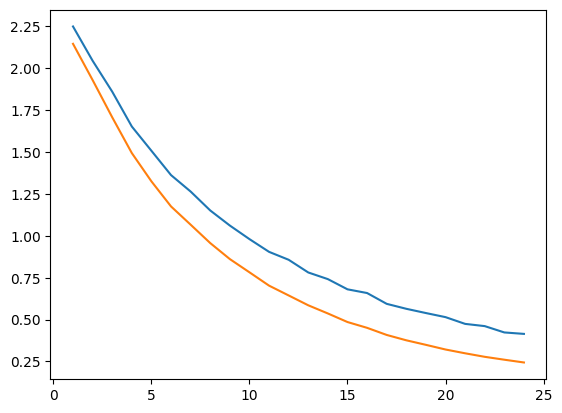

In [51]:
plt.plot(epochs,loss,label='training_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.show()

In [80]:
from tensorflow.keras.models import save_model
save_model(model1, "model.h5")